<a href="https://colab.research.google.com/github/affandhanbad-dev/ML_learning_colab_files/blob/main/Autism_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
import seaborn as sns

In [ ]:
autism_data = pd.read_csv('autism_train.csv')

In [ ]:
autism_data.shape

(800, 22)

In [ ]:
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
autism_data.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
autism_data['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
autism_data.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

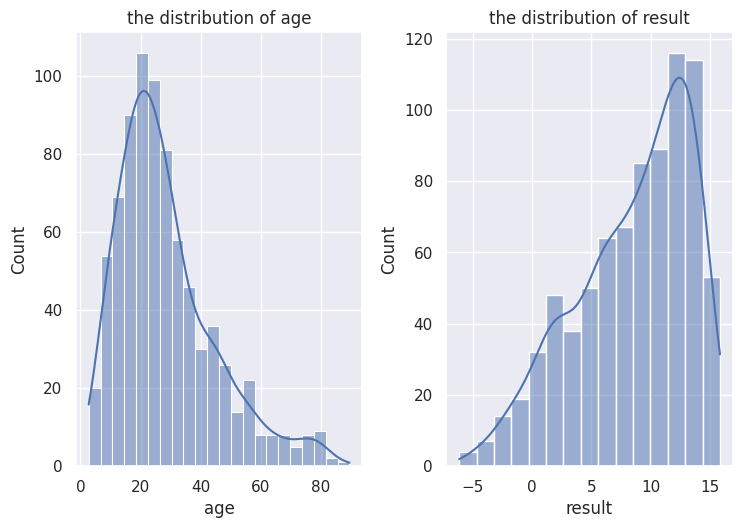

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
for i,columns in enumerate(["age","result"],1):
  plt.subplot(3,4,i)
  sns.histplot(autism_data[columns],kde = True)
  plt.title(f"the distribution of {columns}")
plt.tight_layout()
plt.show()

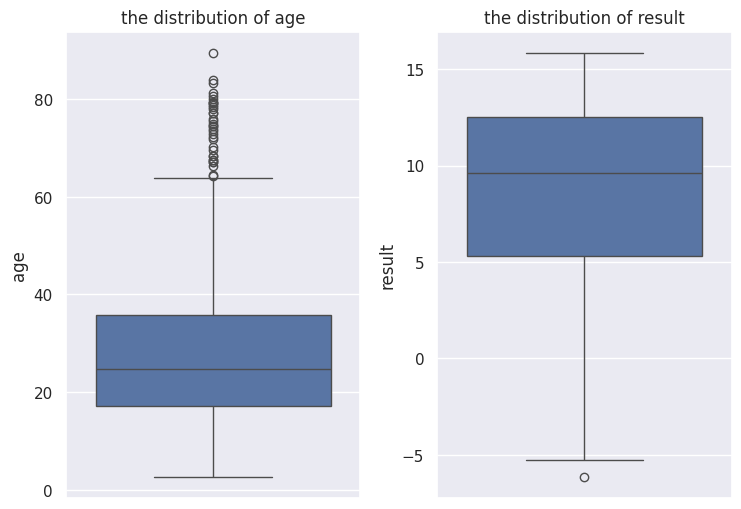

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
for i,columns in enumerate(["age","result"],1):
  plt.subplot(3,4,i)
  sns.boxplot(autism_data[columns])
  plt.title(f"the distribution of {columns}")
plt.tight_layout()
plt.show()

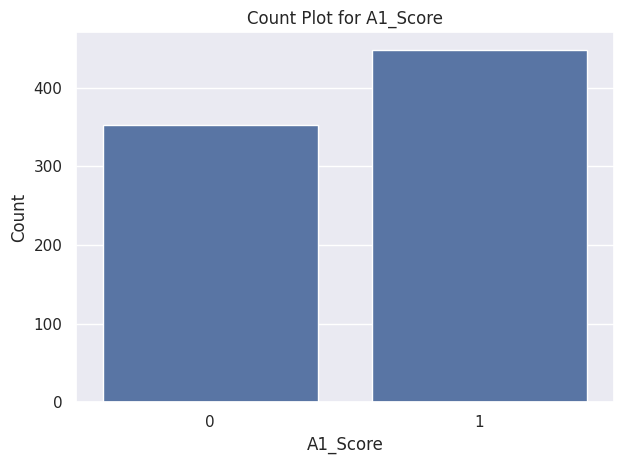

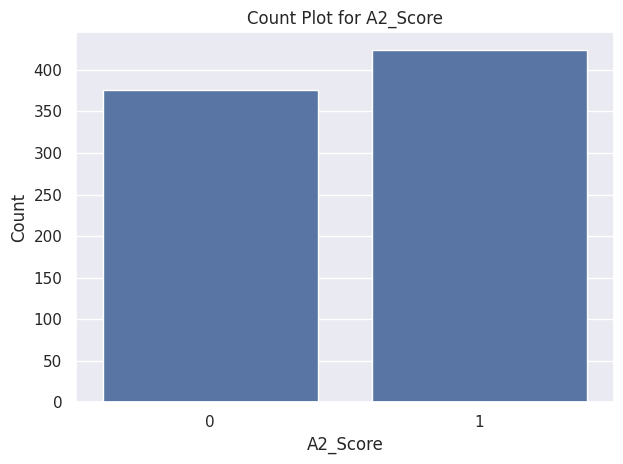

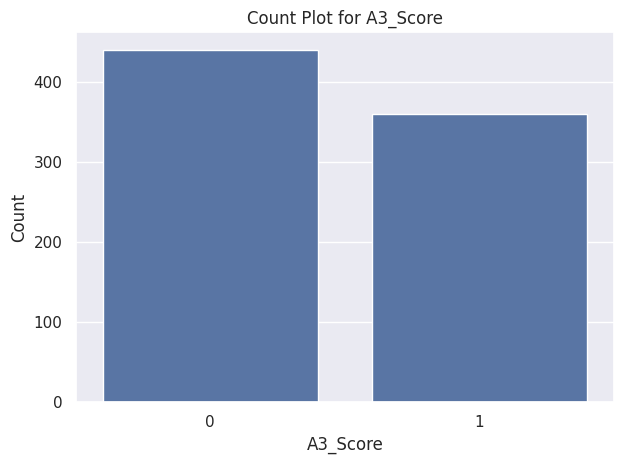

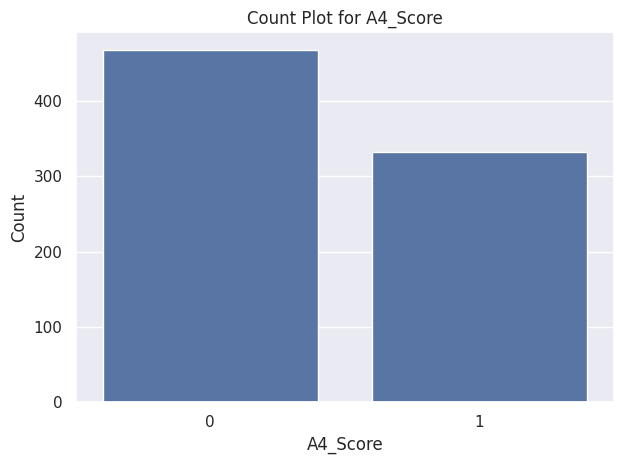

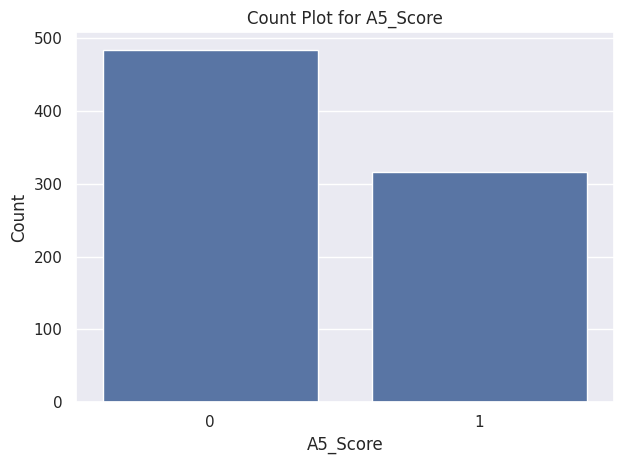

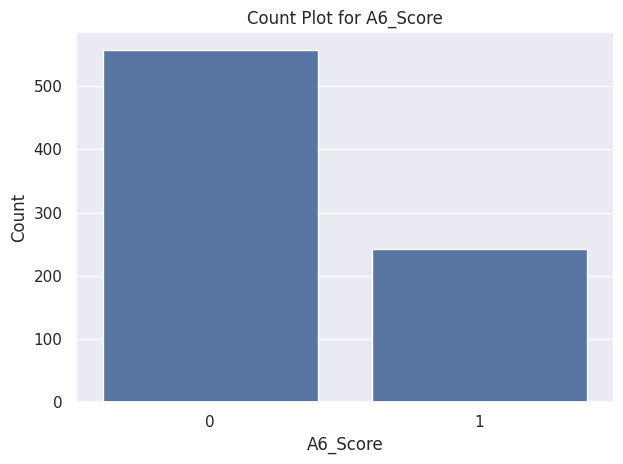

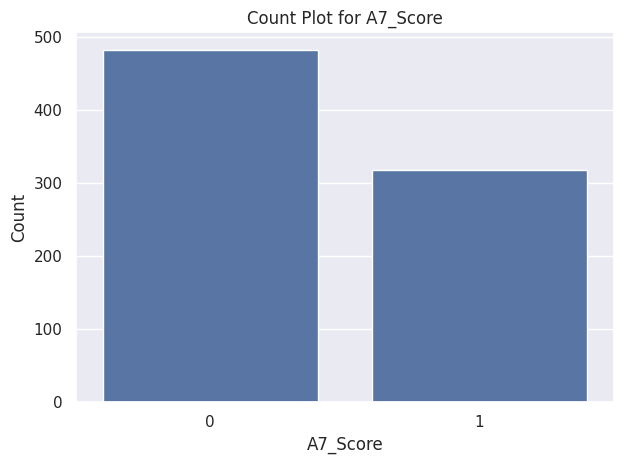

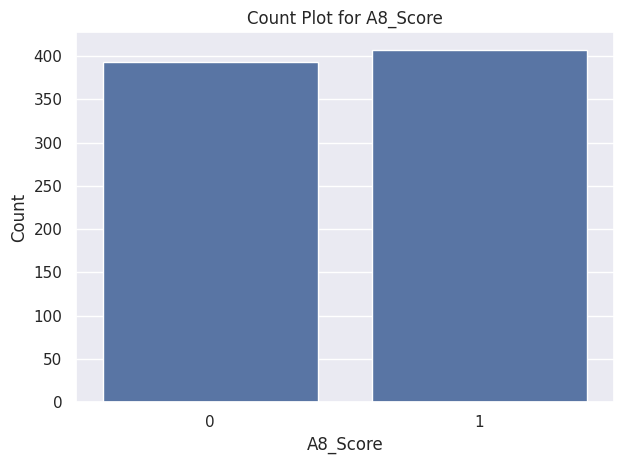

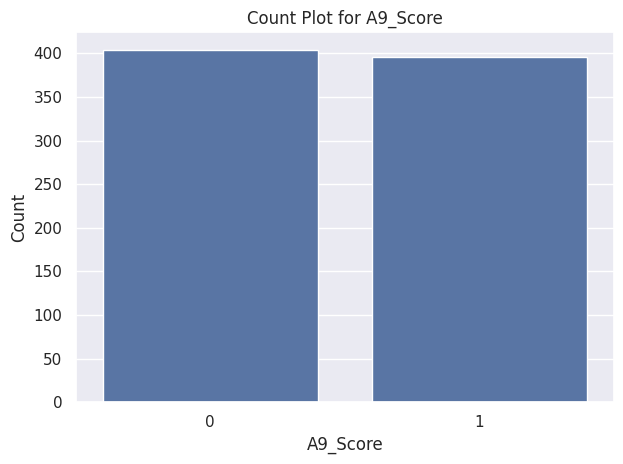

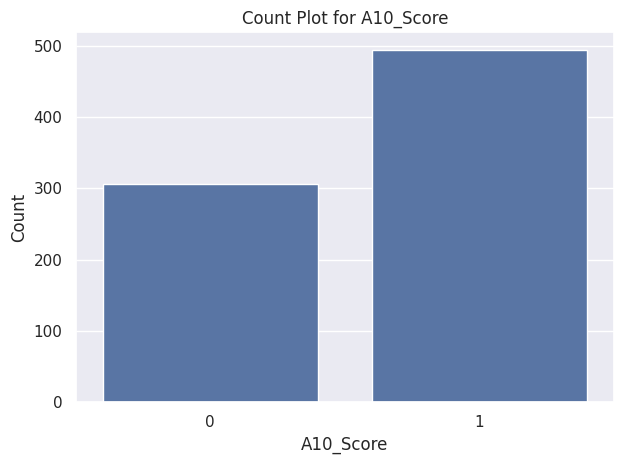

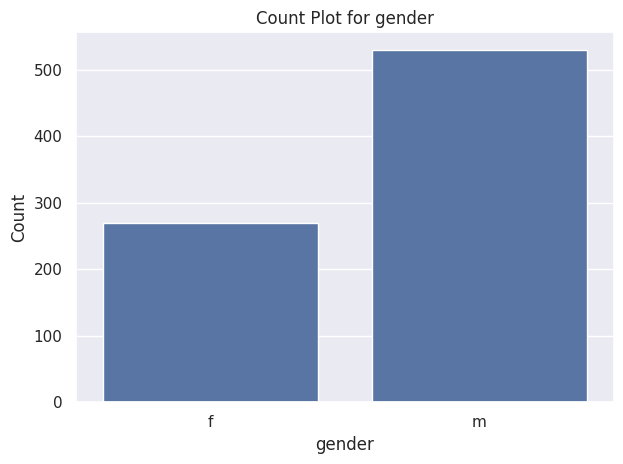

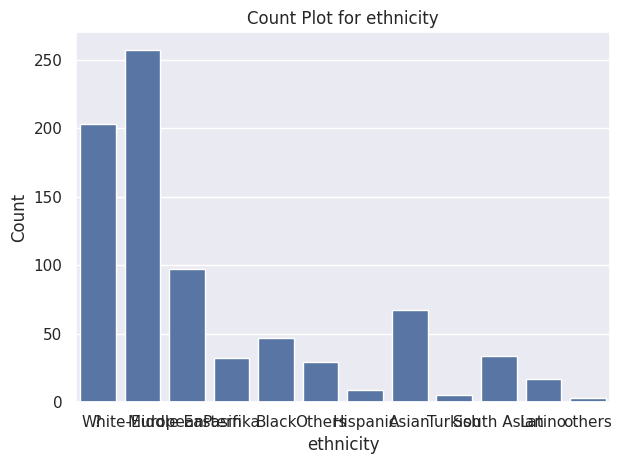

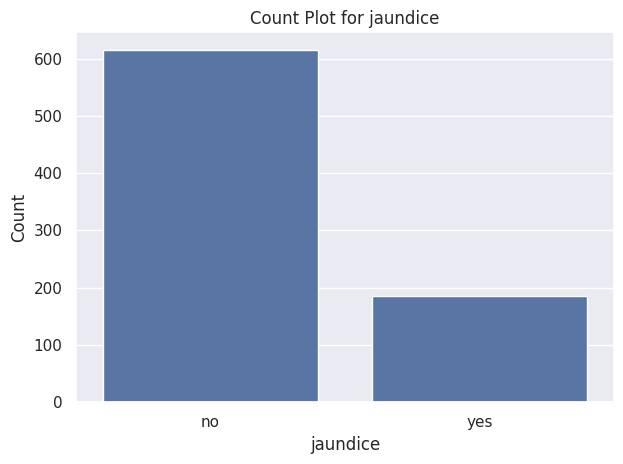

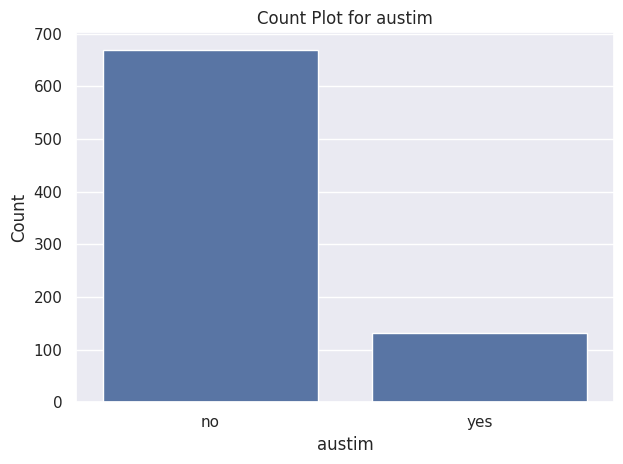

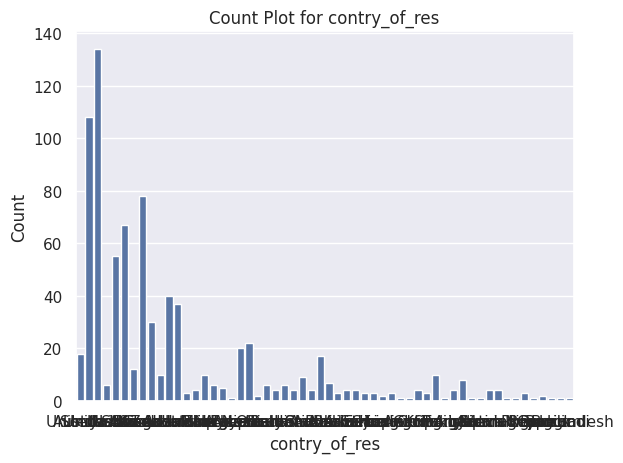

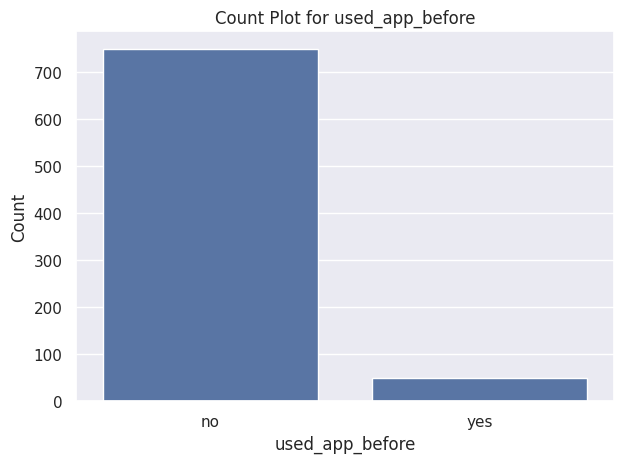

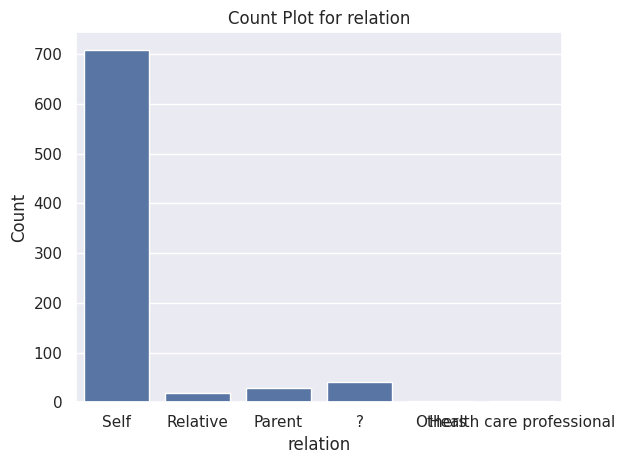

In [ ]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=autism_data[col])
  plt.title(f"Count Plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

In [ ]:
# sns.set(style="darkgrid")
# plt.figure(figsize=(15,15))
# sns.heatmap(autism_data.corr(),annot=True,cmap="coolwarm")
# plt.title("the corelation in data")
# plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
autism_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
autism_data.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
autism_data["age"]= autism_data["age"].astype(int)


In [ ]:
for colm in autism_data.columns:
  numerical = ["age","result","ID"]
  if colm not in numerical:
    print(colm,autism_data[colm].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
autism_data = autism_data.drop("ID",axis=1)
autism_data = autism_data.drop("age_desc",axis=1)

In [ ]:
autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
autism_data["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
mapping = {
    'Viet Nam' : 'Vietnam',
    'Hong Kong' : 'China',
    'Taiwan' : 'China',
    'Sri Lanka' : 'Srilanka',
    'AmericanSamoa' : 'United States'
}
autism_data["contry_of_res"].replace(mapping,inplace=True)

/tmp/ipython-input-2721737891.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  autism_data["contry_of_res"].replace(mapping,inplace=True)


In [ ]:
autism_data['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Srilanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia', 'Serbia',
       'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola', 'Germany',
       'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina', 'Japan',
       'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic', 'Niger',
       'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

/tmp/ipython-input-848766894.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(autism_data["age"])


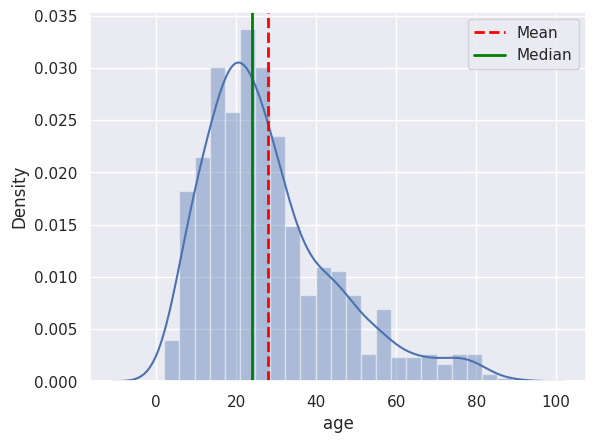

In [ ]:
sns.distplot(autism_data["age"])

mean = autism_data['age'].mean()
median = autism_data['age'].median()

plt.axvline(mean, color='red', linestyle='--', linewidth=2,label='Mean')
plt.axvline(median, color='green', linestyle='-', linewidth=2,label='Median')

plt.legend()
plt.show()

/tmp/ipython-input-888197385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(autism_data["result"])


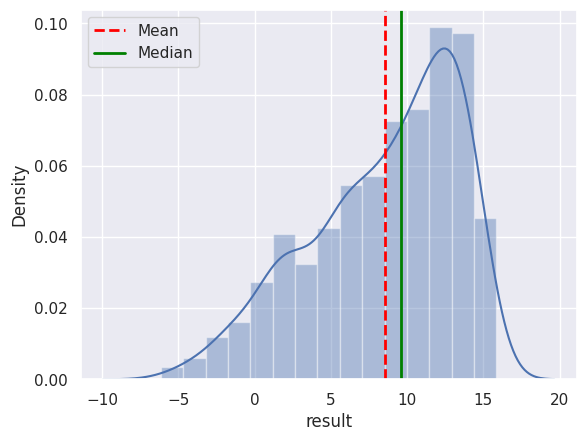

In [ ]:
sns.distplot(autism_data["result"])

mean = autism_data['result'].mean()
median = autism_data['result'].median()

plt.axvline(mean, color='red', linestyle='--', linewidth=2,label='Mean')
plt.axvline(median, color='green', linestyle='-', linewidth=2,label='Median')

plt.legend()
plt.show()

In [ ]:
# q1 = autism_data["age"].quantile(0.25)
# q3 = autism_data['age'].quantile(0.75)
# area = q3-q1
# lower_bound = q1 - 1.5*area
# upper_bound = q3 + 1.5*area
# outlayers = autism_data[(autism_data['age'] < lower_bound) | (autism_data['age'] > upper_bound)]
# len (outlayers)

In [ ]:
# count the outliers using IQR method
Q1 = autism_data["age"].quantile(0.25)
Q3 = autism_data["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = autism_data[(autism_data["age"] < lower_bound) | (autism_data["age"] > upper_bound)]
len(age_outliers)

39

In [ ]:
# count the outliers using IQR method
Q1 = autism_data["result"].quantile(0.25)
Q3 = autism_data["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = autism_data[(autism_data["result"] < lower_bound) | (autism_data["result"] > upper_bound)]
len(age_outliers)

1

In [ ]:
autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
for colm in autism_data.columns:
  numerical = ["age","result","ID"]
  if colm not in numerical:
    print(colm,autism_data[colm].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
autism_data["ethnicity"] = autism_data["ethnicity"].replace({"others":"Others","?":"others"})
autism_data["relation"] = autism_data["relation"].replace({"?":"Others","Relative":"Others","Parent":"Others","Health care professional":"Others"})

In [ ]:
autism_data["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
objects = autism_data.select_dtypes(include="object").columns

In [ ]:
print(objects)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
encoder = {}

for column in objects:
  encoder[column] = LabelEncoder()
  autism_data[column] = encoder[column].fit_transform(autism_data[column])

with open("encoder.pkl","wb") as f:
  pickle.dump(encoder,f)



In [ ]:
encoder

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,10,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,10,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,10,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,10,0,0,44,0,-4.777286,1,0


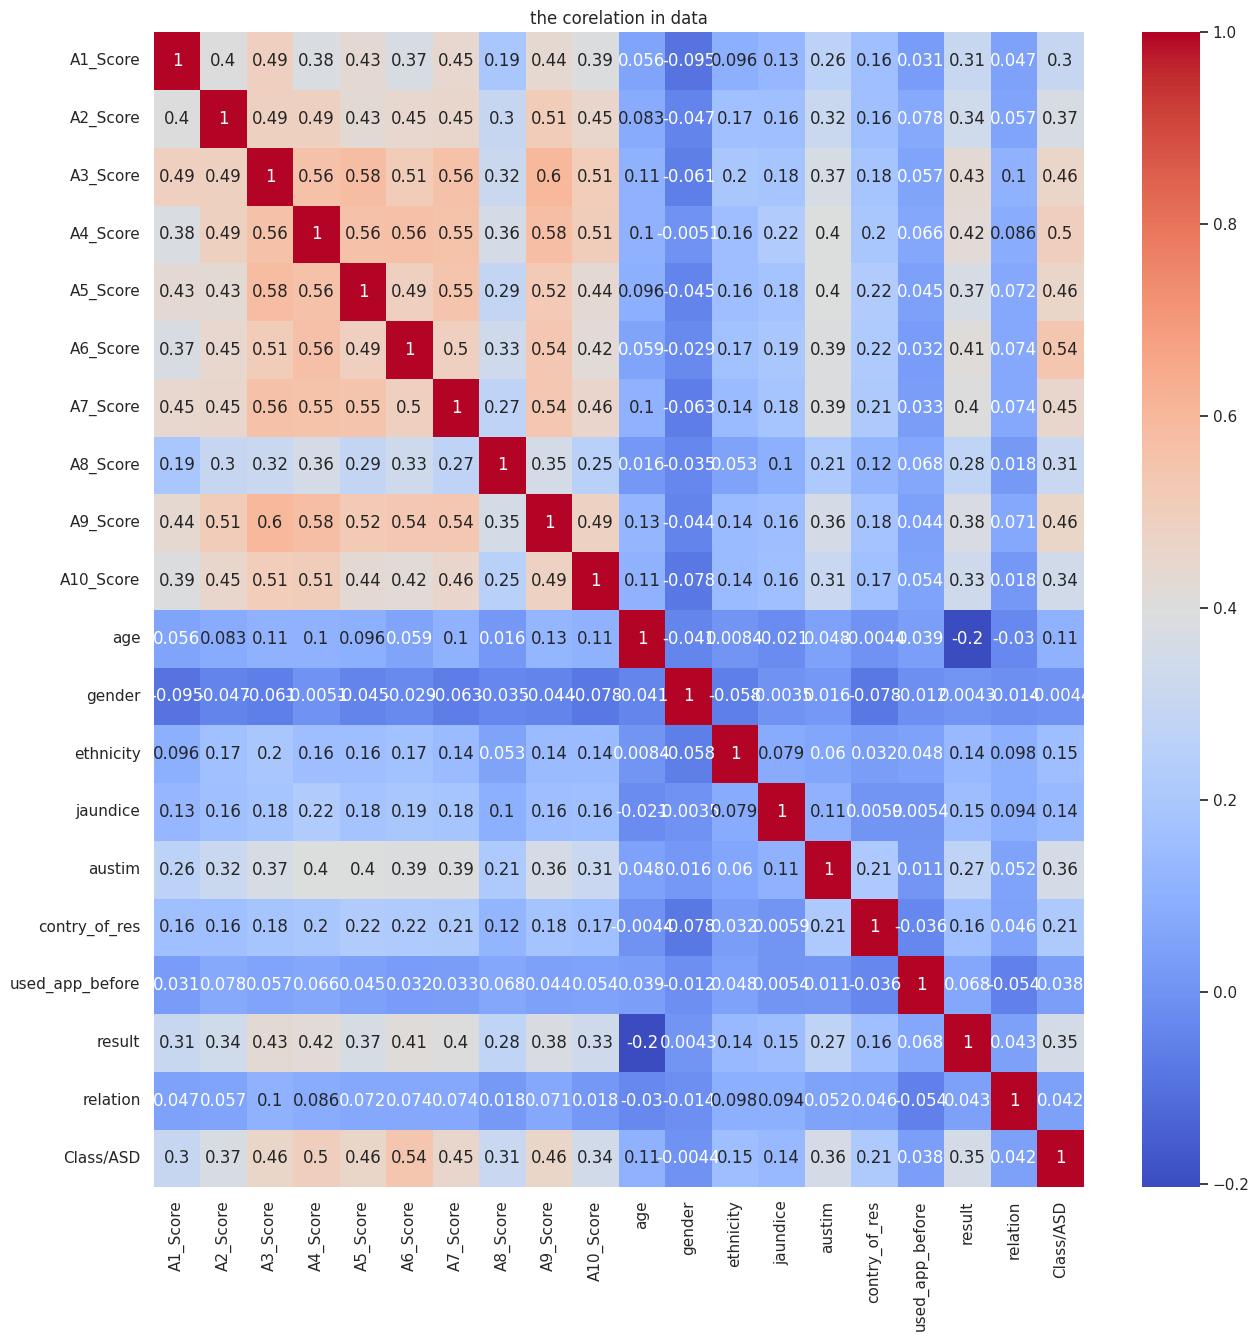

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
sns.heatmap(autism_data.corr(),annot=True,cmap="coolwarm")
plt.title("the corelation in data")
plt.show()

In [ ]:
def outliers(autism_data,column):
  q1 = autism_data[column].quantile(0.25)
  q2 = autism_data[column].quantile(0.75)
  IQR = q2-q1

  lower_bound = q1 - 1.5*IQR
  upper_bound = q2 + 1.5*IQR

  # mean = autism_data[column].mean()
  median = autism_data[column].median()

  autism_data[column] = autism_data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
  return autism_data

In [ ]:
autism_data = outliers(autism_data,"age")
autism_data = outliers(autism_data,"result")

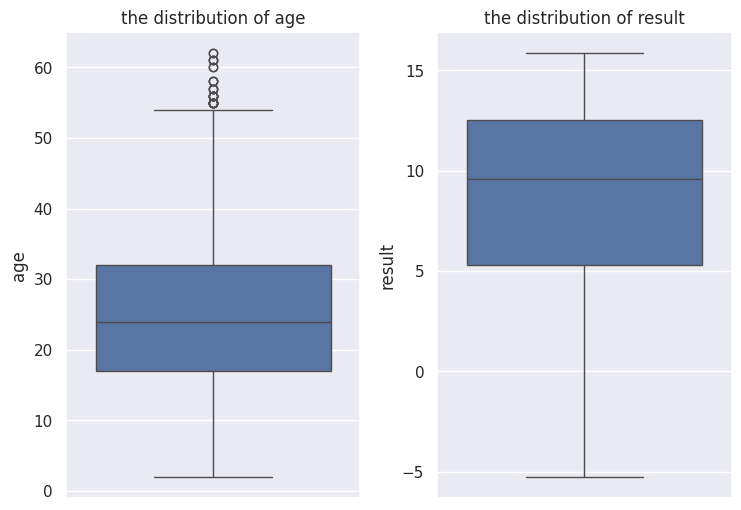

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
for i,columns in enumerate(["age","result"],1):
  plt.subplot(3,4,i)
  sns.boxplot(autism_data[columns])
  plt.title(f"the distribution of {columns}")
plt.tight_layout()
plt.show()

In [ ]:
X = autism_data.drop("Class/ASD",axis=1)
Y = autism_data["Class/ASD"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((640, 19), (160, 19), (640,), (160,))

In [ ]:
Y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
smot = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smot.fit_resample(X_train, Y_train)

In [ ]:
Y_train_resampled.value_counts()

,count
Class/ASD,
1,515
0,515


In [ ]:
models = {
    'Decesion Tree' : DecisionTreeClassifier(random_state=42),
    'Random Forest' : RandomForestClassifier(random_state=42),
    'XGBoost' : XGBClassifier(random_state=42)
}

In [ ]:
cv_scores ={}
for model_name , model in models.items():
  scores = cross_val_score(model,X_train_resampled,Y_train_resampled,cv=5,scoring="accuracy")
  print(f"{model_name} : {np.mean(scores)}")
  cv_scores[model_name] = scores

Decesion Tree : 0.8601941747572814
Random Forest : 0.9184466019417477
XGBoost : 0.9


In [ ]:
cv_scores

{'Decesion Tree': array([0.80582524, 0.87864078, 0.86893204, 0.87864078, 0.86893204]),
 'Random Forest': array([0.91747573, 0.9368932 , 0.91262136, 0.91747573, 0.90776699]),
 'XGBoost': array([0.85436893, 0.92718447, 0.90291262, 0.90776699, 0.90776699])}

In [ ]:
decesion_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [ ]:
dt_paradigm = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [None,5,10,15,20,30],
    'min_samples_split' : [2,5,10,15,20],
    'min_samples_leaf' : [1,2,5,10,15,20]
}

rf_paradigm = {
    'n_estimators' : [50,100,200,500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

xgb_paradigm = {
    'n_estimators' : [50,100,200,500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

In [ ]:
random_search_dt = RandomizedSearchCV(estimator=decesion_tree,param_distributions=dt_paradigm,n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1)
random_search_rf = RandomizedSearchCV(estimator=random_forest,param_distributions=rf_paradigm,n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1)
random_search_xgb = RandomizedSearchCV(estimator=xgboost,param_distributions=xgb_paradigm,n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
random_search_dt.fit(X_train_resampled,Y_train_resampled)
random_search_rf.fit(X_train_resampled,Y_train_resampled)
random_search_xgb.fit(X_train_resampled,Y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, verbose=2)

In [ ]:
best_model = None
best_score = 0
if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_
if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_
if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_

In [ ]:
print(best_model)
print(best_score)

RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
0.9174757281553398


In [ ]:
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [ ]:
print(cross_val_predict(best_model,X_test,Y_test))
print("-"*50)
print(cross_val_score(best_model,X_test,Y_test,cv=5,scoring="accuracy"))
print("-"*50)
print(classification_report(Y_test,cross_val_predict(best_model,X_test,Y_test)))
print("-"*50)
print(confusion_matrix(Y_test,cross_val_predict(best_model,X_test,Y_test)))

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0]
--------------------------------------------------
[0.84375 0.75    0.8125  0.875   0.875  ]
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       124
           1       0.65      0.56      0.60        36

    accuracy                           0.83       160
   macro avg       0.76      0.73      0.75       160
weighted avg       0.82      0.83      0.83       160

--------------------------------------------------
[[113  11]
 [ 16  20]]


In [ ]:
# evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(Y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_test_pred))
print("Classification Report:\n", classification_report(Y_test, y_test_pred))

Accuracy score:
 0.825
Confusion Matrix:
 [[108  16]
 [ 12  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       124
           1       0.60      0.67      0.63        36

    accuracy                           0.82       160
   macro avg       0.75      0.77      0.76       160
weighted avg       0.83      0.82      0.83       160



In [ ]:
autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,10,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,10,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,10,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,10,0,0,44,0,-4.777286,1,0


In [ ]:
input = (1,0,1,0,1,0,1,0,1,1,38.0,0,10,0,0,6,0,6.351166,1)
np_as_array = np.asarray(input)
input_reshaped = np_as_array.reshape(1,-1)
prediction = best_model.predict(input_reshaped)
# print(prediction)
if (prediction[0] == 0):
  print('no autism')
else:
  print('autism')

no autism


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
with open("best_model.pkl","rb") as f:
  model = pickle.load(f)

In [ ]:
# input = (1,0,1,0,1,0,1,0,1,1,38.0,0,10,0,0,6,0,6.351166,1)
# np_as_array = np.asarray(input)
# input_reshaped = np_as_array.reshape(1,-1)
# prediction = model.predict(input_reshaped)
# # print(prediction)
# if (prediction[0] == 0):
#   print('no autism')
# else:
#   print('autism')

no autism


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
